In [23]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [248]:
# generate some random data, maybe from two classes. circle example. XOR. Positive and negative numbers!
data = np.random.normal(0, 1, (10, 2))
class_data = [[], []]
labels = []
for d in data:
    x = d[0]
    y = d[1]
    if y > x:
        labels.append(1)
        class_data[1].append((x, y))
    else:
        labels.append(0)
        class_data[0].append((x, y))

In [727]:
# random data circle, x^2 + y^2 < 0.5 = inside cirlce
m = 200
circle_data = np.random.normal(0, 1, (m, 2))
circle_class_data = [[], []]
circle_labels = []
circle_labels_indices = [[], []]
for i, d in enumerate(circle_data):
    x = d[0]
    y = d[1]
    if np.sqrt(x**2 + y**2) < 1:
        circle_labels.append(1)
        circle_class_data[1].append((x, y))
        circle_labels_indices[1].append(i)
    else:
        circle_labels.append(0)
        circle_class_data[0].append((x, y))
        circle_labels_indices[0].append(i)




In [170]:
# separate data by class
circle_class_data

[[(0.6091782651016516, 1.3239694412800904),
  (1.8035103975030533, -1.2056762631706999),
  (-1.183349532332068, -1.4646611252238062),
  (1.0752597301834017, 0.22441716713966373),
  (-2.316726117092453, -1.8174188051940774)],
 [(0.3855707911153384, 0.04099251496133711),
  (0.6916420114810651, 0.05095519495461874),
  (-0.37628041370994575, -0.474565818028293),
  (-0.15747688395868015, 0.594035534266988),
  (0.6971593332397283, -0.6342397062820633)]]

In [249]:
data

array([[-0.66665255,  0.18785936],
       [ 1.49453777,  0.86236369],
       [-0.84404446, -0.1852627 ],
       [-0.29333837,  0.39083361],
       [ 0.41297114, -0.14363475],
       [-0.17670632, -1.51649167],
       [ 0.20246671,  2.21059202],
       [-0.29216809,  0.0951694 ],
       [-0.45863388,  0.65471894],
       [-0.90376853,  0.72320142]])

In [280]:
np.shape(np.array(class_data[0])[:, :1])

(3, 1)

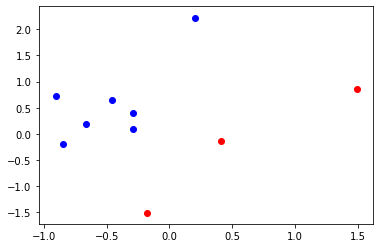

In [661]:
plt.scatter(np.array(class_data[0])[:, :1], np.array(class_data[0])[:, 1:], color='red')
plt.scatter(np.array(class_data[1])[:, :1], np.array(class_data[1])[:, 1:], color='blue')
#plt.scatter(ex1, np.zeros(len(ex1)), color='blue')

#plt.scatter(data[:,:1], data[:,1:])

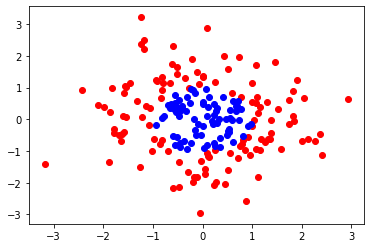

In [728]:
# circles
plt.scatter(np.array(circle_class_data[0])[:, :1], np.array(circle_class_data[0])[:, 1:], color='red')
plt.scatter(np.array(circle_class_data[1])[:, :1], np.array(circle_class_data[1])[:, 1:], color='blue')
#plt.scatter(ex1, np.zeros(len(ex1)), color='blue')

#plt.scatter(data[:,:1], data[:,1:])

In [159]:
circle_labels

[0, 1, 0, 0, 0, 0, 0, 1, 0, 1]

In [168]:
circle_class_data

[[(1.329460263492281, 2.489660895206533),
  (1.5025689871883967, 0.18780718174103495),
  (0.8855990402533241, 0.9120993117137289),
  (-1.2237724557276113, 0.07659382932382235),
  (1.0006652763260084, 0.08705092565029993),
  (2.035094656098583, 0.2717857995178497),
  (1.4280643051596187, -1.3723517162615448),
  (0.0691177667515032, -2.3469516548429223),
  (-1.5145103995910572, -0.3881980588251376),
  (-2.847473004836695, -1.0850199816292698)],
 []]

In [251]:
mean_total = np.mean(data, axis=0)

In [252]:
mean_total

array([-0.15253366,  0.32793493])

In [253]:
# Worry about annoying shapes here. It's not simply squaring it its a dot product. a.dot(a.T)
#S_B = np.array([len(cd)*(np.mean(cd, axis=0) - mean_total).dot((np.mean(cd, axis=0) - mean_total)).T for cd in class_data])
#S_W = np.array([[(d - np.mean(cd, axis=0))**2 for d in cd] for cd in class_data])
def between_matrix(class_data, mean_total):
    S_B = None
    for cd in class_data:
        n = len(cd)
        m_i = np.mean(cd, axis=0)
        temp = np.reshape((m_i - mean_total), (len(mean_total), 1))
        if S_B is None:
            S_B = n*np.dot(temp, temp.T)
            #print(S_B)
            continue
        #print("new addition", n*np.dot(temp, temp.T))
        S_B += n*np.dot(temp, temp.T)
        #print(S_B)
    print(S_B) 
    return S_B
    

In [254]:
S_B = between_matrix(class_data, mean_total)

[[ 2.28052864 -1.85656606]
 [-1.85656606  1.5114204 ]]


In [255]:
def within_matrix(class_data, mean_total):
    S_W = None
    for cd in class_data:
        for d in cd:
            m_i = np.mean(cd, axis=0)
            temp = np.reshape((d - m_i), (len(m_i), 1))
            if S_W is None:
                S_W = n*np.dot(temp, temp.T)
                print(S_W)
                continue
            print("new addition", n*np.dot(temp, temp.T))
            S_W += n*np.dot(temp, temp.T)
    print(S_W) 
    return S_W

In [256]:
S_W = within_matrix(class_data, mean_total)

[[4.20998156 5.1765899 ]
 [5.1765899  6.36513073]]
new addition [[ 0.13441942 -0.10025206]
 [-0.10025206  0.07476952]]
new addition [[2.83987012 4.71240395]
 [4.71240395 7.81963613]]
new addition [[0.20299073 0.39752451]
 [0.39752451 0.77848747]]
new addition [[0.71775679 1.45435127]
 [1.45435127 2.94687232]]
new addition [[ 0.14761806 -0.16461717]
 [-0.16461717  0.18357381]]
new addition [[ 2.22864538  5.43499587]
 [ 5.43499587 13.25432044]]
new addition [[ 0.14963574 -0.42147999]
 [-0.42147999  1.18718549]]
new addition [[0.00021313 0.00235935]
 [0.00235935 0.02611792]]
new addition [[ 0.96187518 -0.30868382]
 [-0.30868382  0.09906244]]
[[11.59300612 16.18319181]
 [16.18319181 32.73515628]]


In [139]:
# For when we reshape
# np.reshape(mean_one, (2, 1))

In [257]:
# eigenvalue problem
vals, vecs = np.linalg.eig(np.dot(np.linalg.inv(S_W), S_B))

In [305]:
# eigenvalue problem
vals, vecs = np.linalg.eig(np.dot(np.linalg.inv(S_W), S_B))
eig_pairs = [(np.abs(vals[i]), vecs[:,i]) for i in range(len(vals))]
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

In [306]:
eig_pairs

[(1.294741433282689, array([ 0.87322265, -0.48732146])),
 (5.551115123125783e-17, array([0.63133722, 0.77550842]))]

In [307]:
# sort vals, vecs
w = eig_pairs[0][1]
# reshape

In [308]:
w = np.reshape(w, (2,))

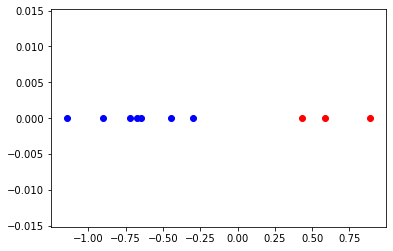

In [309]:
ex0 = np.array([np.dot(w, d) for d in class_data[0]])
ex1 = np.array([np.dot(w, d) for d in class_data[1]])

plt.scatter(ex0, np.zeros(len(ex0)), color='red')
plt.scatter(ex1, np.zeros(len(ex1)), color='blue')
# dope!
# check this. should be n-1 classes I forgot!

In [192]:
# Try the above on circle data.
circle_mean_total = np.mean(circle_data, axis=0)
S_W_circle = within_matrix(circle_class_data, circle_mean_total)
S_B_circle = between_matrix(circle_class_data, circle_mean_total)

[[ 1.49623642  4.67716201]
 [ 4.67716201 14.62058011]]
new addition [[13.04561716 -4.46284562]
 [-4.46284562  1.52671896]]
new addition [[5.57832674 4.14167651]
 [4.14167651 3.07502323]]
new addition [[4.6456214  3.50157626]
 [3.50157626 2.63926722]]
new addition [[21.42395029 11.38214621]
 [11.38214621  6.04712253]]
new addition [[0.07556762 0.06903013]
 [0.06903013 0.06305821]]
new addition [[0.78683657 0.24042218]
 [0.24042218 0.0734623 ]]
new addition [[1.55951833 0.97407268]
 [0.97407268 0.60840425]]
new addition [[ 0.65804496 -1.10096022]
 [-1.10096022  1.84199179]]
new addition [[ 0.80653463 -0.98729671]
 [-0.98729671  1.20857152]]
[[50.07625412 18.43498344]
 [18.43498344 31.70420012]]
[[0.15693628 0.31525847]
 [0.31525847 0.63330103]]


In [193]:
S_W_circle

array([[50.07625412, 18.43498344],
       [18.43498344, 31.70420012]])

In [194]:
# eigenvalue problem
w_circle = np.dot(np.linalg.inv(S_W_circle), S_B_circle)

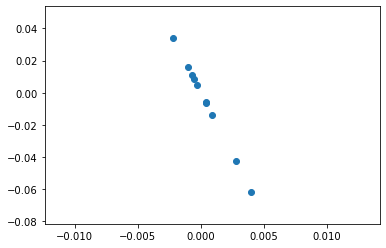

In [195]:
ex_circle = np.array([np.dot(w_circle, d) for d in circle_data])
plt.scatter(ex_circle[:,:1], ex_circle[:,1:])
# dope!

In [693]:
# Quadratic Kernel
def quadratic_kernel(x_1, x_2):
    return (np.matmul(x_1.T, x_2) + 1)**2

#chosen_kernel = sklearn.metrics.pairwise.polynomial_kernel #sklearn.metrics.pairwise.rbf_kernel
chosen_kernel = quadratic_kernel

In [694]:
chosen_kernel(np.reshape(np.array([1, 2]), (2, 1)), np.reshape(np.array([3, 4]), (2, 1)))[0][0]

144

In [695]:
kernel_matrix = chosen_kernel(circle_data)

TypeError: quadratic_kernel() missing 1 required positional argument: 'x_2'

In [527]:
"""
# kernel LDA get kernels from scikit learn
chosen_kernel = quadratic_kernel

kernel_matrix = [] #this is a vector!
for i, ccd in enumerate(circle_class_data):
    kernel_matrix.append([])
    for j, cid in enumerate(circle_data):
        M_ij = 0
        for ccd_w in ccd:
            M_ij += chosen_kernel(cid, ccd_w)
        M_ij = M_ij/float(len(ccd))
        kernel_matrix[i].append(M_ij)
kernel_matrix = np.array(kernel_matrix)

kernel_mean_total = np.sum(kernel_matrix, axis=0)
  
M = None

# What is happening!
for cd in kernel_matrix:
    n = len(cd)
    M_i = np.mean(cd, axis=0)
    temp = np.reshape((m_i - mean_total), (len(mean_total), 1))
    if S_B is None:
        S_B = n*np.dot(temp, temp.T)
        #print(S_B)
        continue
    #print("new addition", n*np.dot(temp, temp.T))
    S_B += n*np.dot(temp, temp.T)
    #print(S_B)
print(S_B) 
"""


'\n# kernel LDA get kernels from scikit learn\nchosen_kernel = quadratic_kernel\n\nkernel_matrix = [] #this is a vector!\nfor i, ccd in enumerate(circle_class_data):\n    kernel_matrix.append([])\n    for j, cid in enumerate(circle_data):\n        M_ij = 0\n        for ccd_w in ccd:\n            M_ij += chosen_kernel(cid, ccd_w)\n        M_ij = M_ij/float(len(ccd))\n        kernel_matrix[i].append(M_ij)\nkernel_matrix = np.array(kernel_matrix)\n\nkernel_mean_total = np.sum(kernel_matrix, axis=0)\n  \nM = None\n\n# What is happening!\nfor cd in kernel_matrix:\n    n = len(cd)\n    M_i = np.mean(cd, axis=0)\n    temp = np.reshape((m_i - mean_total), (len(mean_total), 1))\n    if S_B is None:\n        S_B = n*np.dot(temp, temp.T)\n        #print(S_B)\n        continue\n    #print("new addition", n*np.dot(temp, temp.T))\n    S_B += n*np.dot(temp, temp.T)\n    #print(S_B)\nprint(S_B) \n'

In [729]:
kernel_matrix = []
for i in range(len(circle_data)):
    kernel_matrix.append([])
    for j in range(len(circle_data)):
        kernel_matrix[i].append(chosen_kernel(np.reshape(circle_data[i], (2, 1)), np.reshape(circle_data[j], (2, 1)))[0][0])
kernel_matrix = np.array(kernel_matrix)

In [730]:
class_kernel_matrix = [[], []]
for i, l in enumerate(circle_labels):
    class_kernel_matrix[l].append(kernel_matrix[i])

In [731]:
np.shape(kernel_matrix)

(200, 200)

In [732]:
np.shape(class_kernel_matrix)

(2,)

In [733]:
k_matrix = np.mean(kernel_matrix, axis=0)

In [734]:
np.shape(k_matrix)

(200,)

In [553]:
kc_matrix = [] #L x 1 x n classes. 
for i, indices in enumerate(circle_labels_indices):
    kc_matrix.append([])
    n = len(indices)
    kc_matrix[i] = (1/float(n))*np.mean(kernel_matrix[indices], axis=0)
kc_matrix = np.array(kc_matrix)

In [554]:
np.shape(kc_matrix)

(2, 1000, 1, 1)

In [735]:
kc_matrix = [] #L x 1 x n classes. 
for i, ccd in enumerate(circle_class_data):
    kc_matrix.append([])
    for j, cid in enumerate(circle_data):
        # sum up the length
        n = len(ccd)
        kc_matrix[i].append(1/float(n)*sum([chosen_kernel(np.reshape(cid, (2, 1)), np.reshape(ccd_w, (2, 1)))[0][0] for ccd_w in ccd]))
kc_matrix = np.array(kc_matrix)


In [736]:
kj_matrix = [] #N x L x Li. 
for i, ccd in enumerate(circle_class_data):
    kj_matrix.append([])
    for j, cid in enumerate(circle_data):
        kj_matrix[i].append([])
        for k, ccd_w in enumerate(ccd):
            kj_matrix[i][j].append(chosen_kernel(np.reshape(cid, (2, 1)), np.reshape(ccd_w, (2, 1)))[0][0])

#kj_matrix = np.array(kj_matrix)


In [737]:
np.shape(kj_matrix)

(2, 200)

In [738]:
np.shape(kc_matrix)

(2, 200)

In [739]:
np.shape(k_matrix)

(200,)

In [740]:
import pdb
def kernel_between_matrix(kc_matrix, k_matrix, class_data):
    kernel_S_B = None
    k_kt = np.matmul(np.reshape(k_matrix, (m, 1)), np.reshape(k_matrix, (m, 1)).T)
    for i, kc in enumerate(kc_matrix):
        n = len(class_data[i])
        if kernel_S_B is None:
            kernel_S_B = n*np.matmul(np.reshape(kc, (m, 1)),np.reshape(kc, (m, 1)).T) - k_kt
            continue
        kernel_S_B += n*np.matmul(np.reshape(kc, (m, 1)),np.reshape(kc, (m, 1)).T) - k_kt
    return kernel_S_B
    
def kernel_within_matrix(kernel_matrix, kc_matrix, class_data):
    rhs = None
    for i, kc in enumerate(kc_matrix):
        n = len(class_data[i])
        
        if rhs is None:
            rhs = n*np.dot(np.reshape(kc, (m, 1)),np.reshape(kc, (m, 1)).T) 
            continue
        rhs += n*np.dot(np.reshape(kc, (m, 1)),np.reshape(kc, (m, 1)).T)
    return kernel_matrix **2 - rhs 

def kernel_within_matrix2(kj_matrix, class_data, g):
    rhs = None
    for i, kj in enumerate(kj_matrix):
        n = len(class_data[i])
        mid = np.identity(n) - (np.ones((n, n))/float(n))
        print(np.shape(mid))
        if rhs is None:
            #pdb.set_trace()
            test = np.matmul(np.reshape(kj, (m, n)), mid)
            rhs = np.matmul(test, np.reshape(kj, (m, n)).T)
            continue
        rhs += np.matmul(np.matmul(kj, mid), np.transpose(kj))
    return rhs + g*np.identity(m)

In [741]:
np.shape(kj_matrix[0])

(200, 122)

In [756]:
kernel_S_B = kernel_between_matrix(kc_matrix, k_matrix, circle_class_data)
#kernel_S_W = kernel_within_matrix(kernel_matrix, kc_matrix, circle_class_data)
kernel_S_W = kernel_within_matrix2(kj_matrix, circle_class_data, 10)

(122, 122)
(78, 78)


In [757]:
np.shape(kernel_S_B)

(200, 200)

In [758]:
w_circle_kernel = np.matmul(np.linalg.inv(kernel_S_W), kernel_S_B)

In [759]:
np.shape(w_circle_kernel)

(200, 200)

In [760]:
# eigenvalue problem
vals, vecs = np.linalg.eig(np.dot(np.linalg.inv(kernel_S_W), kernel_S_B))
eig_pairs = [(np.abs(vals[i]), vecs[:,i]) for i in range(len(vals))]
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

In [761]:
w_circle_kernel = eig_pairs[0][1]

In [762]:
w_circle_kernel

array([-0.08799514+0.j,  0.0333693 +0.j, -0.01036156+0.j, -0.04588341+0.j,
        0.08080074+0.j, -0.00461409+0.j, -0.08002443+0.j, -0.07050734+0.j,
       -0.05835017+0.j, -0.09889307+0.j, -0.04740763+0.j, -0.00431309+0.j,
        0.08785424+0.j, -0.0138764 +0.j, -0.02295476+0.j, -0.04229133+0.j,
       -0.06766127+0.j,  0.02215719+0.j, -0.00157516+0.j, -0.08813861+0.j,
        0.06895786+0.j, -0.0303163 +0.j, -0.06588355+0.j, -0.09635354+0.j,
       -0.05123013+0.j, -0.04281024+0.j, -0.04039447+0.j, -0.0714552 +0.j,
       -0.06582499+0.j, -0.10027185+0.j, -0.00952646+0.j, -0.02390586+0.j,
       -0.06283314+0.j, -0.08695729+0.j, -0.08732797+0.j, -0.08928008+0.j,
       -0.03669646+0.j, -0.09021155+0.j, -0.0409127 +0.j, -0.06731988+0.j,
       -0.08881284+0.j, -0.09461424+0.j, -0.03705219+0.j, -0.09780608+0.j,
       -0.02781016+0.j, -0.03035359+0.j, -0.01083407+0.j, -0.06001418+0.j,
       -0.06751614+0.j, -0.08081888+0.j, -0.07485506+0.j, -0.0750898 +0.j,
       -0.09741567+0.j,  

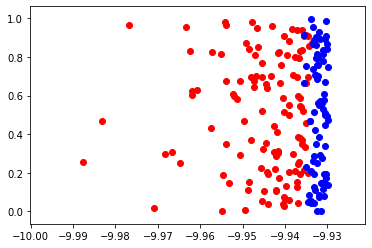

In [764]:
# Visualize what it looks like.
ex_circle_0 = np.array([np.dot(w_circle_kernel, d) for d in class_kernel_matrix[0]])
ex_circle_1 = np.array([np.dot(w_circle_kernel, d) for d in class_kernel_matrix[1]])
plt.scatter(ex_circle_0, np.random.random(len(ex_circle_0)), color='red')
plt.scatter(ex_circle_1, np.random.random(len(ex_circle_1)), color='blue')

# dope!

In [682]:
class_kernel_matrix[0]

[array([ 1.43240602e+00,  1.06451148e+00,  1.34630315e+01,  6.53767163e-02,
         1.21548242e-02,  1.63064660e+00,  4.85025666e-01,  5.80292414e+00,
         1.23080594e+01,  7.20192185e+00,  3.52143618e+00,  2.46807000e-04,
        -9.19788371e-01,  1.09912411e+01, -5.74312186e-02,  1.28335551e+01,
         2.55742145e+00,  5.73458352e-01,  4.37469797e+00,  4.25967213e+00,
         4.82898064e+01, -7.12092580e-01,  2.50016230e-03, -2.29490127e-01,
         7.93416280e+00, -1.00811584e-02, -3.97913638e+00,  2.18331082e-01,
         3.09694407e+00,  6.86154102e+00,  2.83397482e+00,  5.72800356e+00,
         3.09098220e-01, -4.00883830e-04, -7.63393458e-01, -1.33743658e+00,
         5.50289935e+00,  1.89110697e+00,  6.10599502e+00, -1.55185240e+00,
         3.44999281e-01,  2.02865742e-04,  2.05707711e+00,  9.22077543e+00,
         2.15377320e+00,  1.89330427e-01,  2.77890121e+00,  1.10754294e-01,
         4.86629945e+01,  7.02823097e-01]),
 array([-8.25654824e-02,  5.90714591e+00,  6

In [ ]:
# Are new samples with old training samples or new samples?

In [316]:
np.shape(kc_matrix)

(2, 10)

In [ ]:
# Try XOR or circle for my other guy.

In [ ]:
# extend to 3 dimensions